# Bootstrap Resampling

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
# matplotlib configuration
import matplotlib as mpl
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["legend.fontsize"] = 12
# retina display only (e.g. MacOS)
%config InlineBackend.figure_format = 'retina'

# Example

You record the time interval between spikes for a neuron (see simulated `intervals` below).

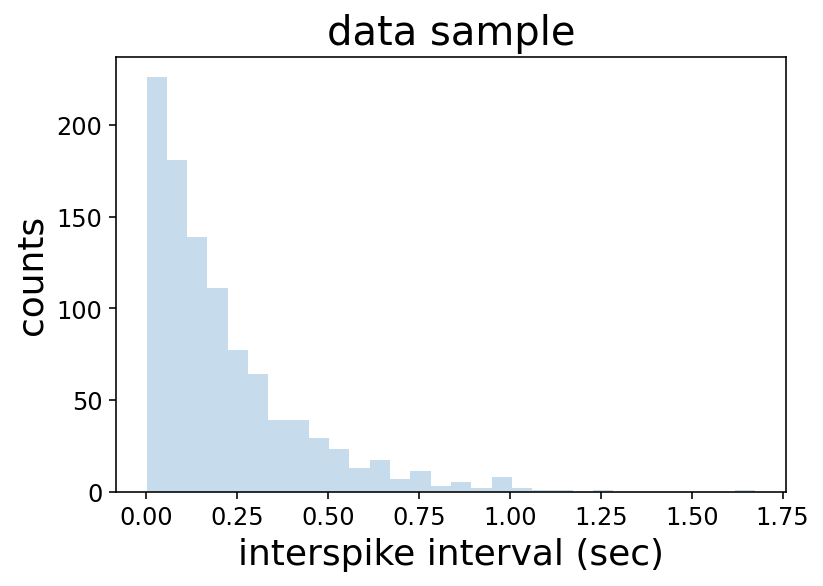

In [29]:
intervals = st.expon(loc=0, scale=0.2).rvs(size=(1000,))

plt.hist(intervals, bins=30, alpha=0.25)
plt.xlabel('interspike interval (sec)')
plt.ylabel('counts')
plt.title('data sample');

What is your best estimate of the neuron's spike rate based on your sample data?

In [30]:
spike_rate = 1 / intervals.mean()

print(f"Estimate of mean spike rate is {spike_rate :.3f} per second.")

Estimate of mean spike rate is 4.706 per second.


How confindent are you in this estimate of the spike rate?

If you were to compare this neuron to another neuron, how would you decide wether or not they were the same or different types of spiking neurons?

### Construct a 95% bootstrap confidence interval for the neuron's spike rate.

* An interval of spike rates that you are 95% sure contains the neuron's true average spike rate.
* A distribution of spike rates you would expect to observe by random chance for repeated measurements from this or similar neurons.

### But first, an example of random choice with replacement.

In [31]:
x = list(range(6))
print(x)

[0, 1, 2, 3, 4, 5]


In [32]:
# Five random selections of the same size as x with replacement.
for i in range(5):
    x2 = np.random.choice(x, size=len(x), replace=True)
    print(x2)

[3 4 4 4 1 2]
[0 5 4 4 1 1]
[2 5 3 0 5 2]
[5 2 2 4 4 4]
[1 2 1 0 4 5]


### Construct a 95% bootstrap confidence interval for the neuron's spike rate.

In [33]:
num_bootstraps = 1000

# create memory for spike rates from each bootstrap resampling
bootstrap_spike_rates = np.zeros((num_bootstraps,))

# Create each bootstrap sample set from the original observations
# and compute its estimated spike rate
for i in range(num_bootstraps):
    # bootstrapped sample data set
    bootstrap_sample = np.random.choice(intervals, size=intervals.shape, replace=True)
    
    # store spike rate for bootstrapped sample
    bootstrap_spike_rates[i] = 1 / bootstrap_sample.mean()

Plot the distribution of bootstrapped spike rates.

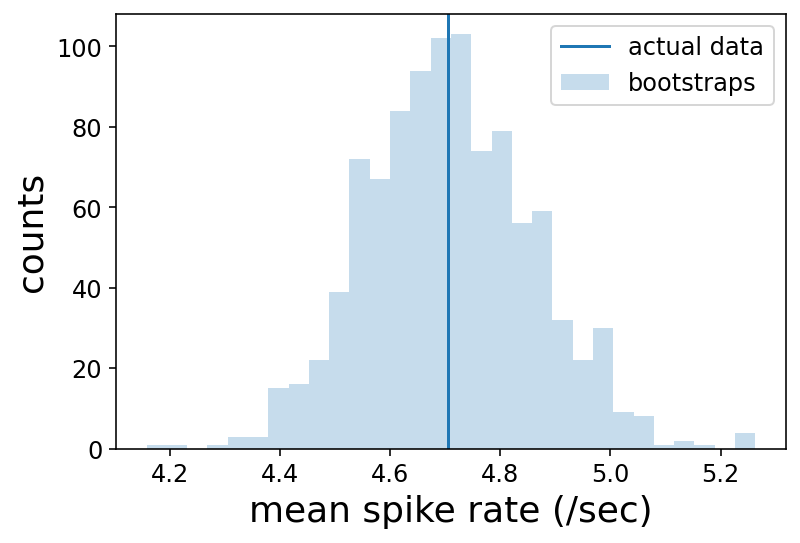

In [34]:
plt.hist(bootstrap_spike_rates, 30, alpha=0.25, label='bootstraps')
plt.axvline(spike_rate, label='actual data')
plt.xlabel('mean spike rate (/sec)')
plt.ylabel('counts')
plt.legend();

Set the 95% confidence limits based on the 2.5% and 97.5% quantiles.

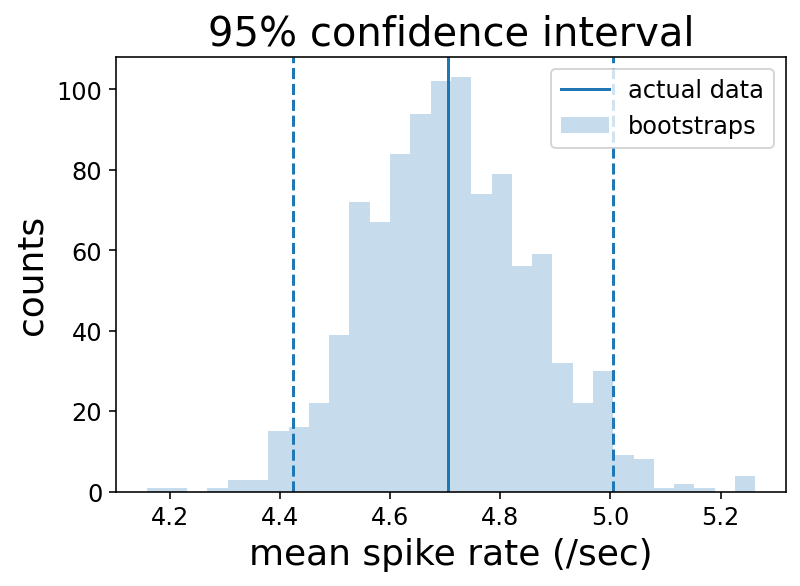

In [36]:
lb, ub = np.quantile(bootstrap_spike_rates, [0.025, 0.975])

plt.hist(bootstrap_spike_rates, 30, alpha=0.25, label='bootstraps')
plt.axvline(spike_rate, label='actual data')
plt.axvline(lb, ls='--')
plt.axvline(ub, ls='--')
plt.xlabel('mean spike rate (/sec)')
plt.ylabel('counts')
plt.title('95% confidence interval')
plt.legend();

# Exercise

You measure a protein's expression level in each of 100 cells (see simulated `expr_levels` below).

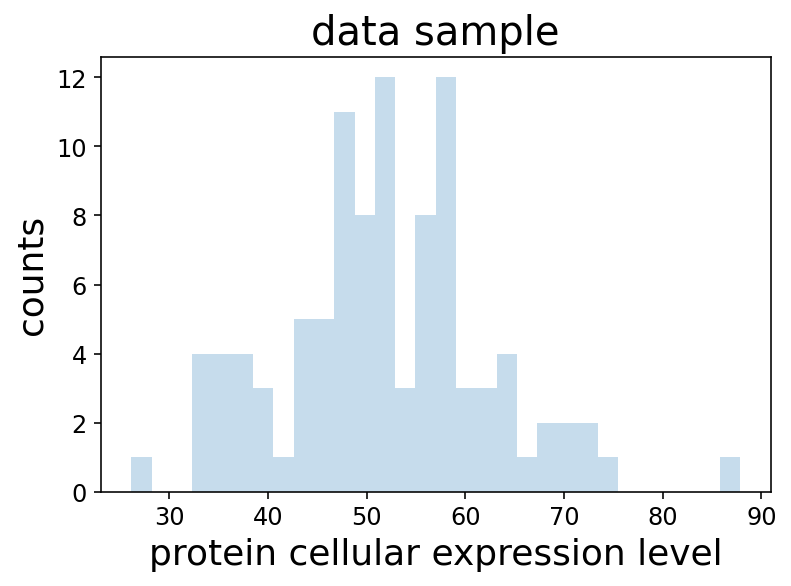

In [37]:
expr_levels = st.norm(50, 10).rvs((100,))

plt.hist(expr_levels, 30, alpha=0.25)
plt.xlabel('protein cellular expression level')
plt.ylabel('counts')
plt.title('data sample');

Using Central Limit Theorem, what is the 95% confidence interval for your estimate of the mean expression level?

In [39]:
n = len(expr_levels)
mu = expr_levels.mean()
sem = expr_levels.std() / np.sqrt(n)

clt_dist_for_mean = st.norm(mu, sem)

In [40]:
lb, ub = clt_dist_for_mean.ppf([0.025, 0.975])

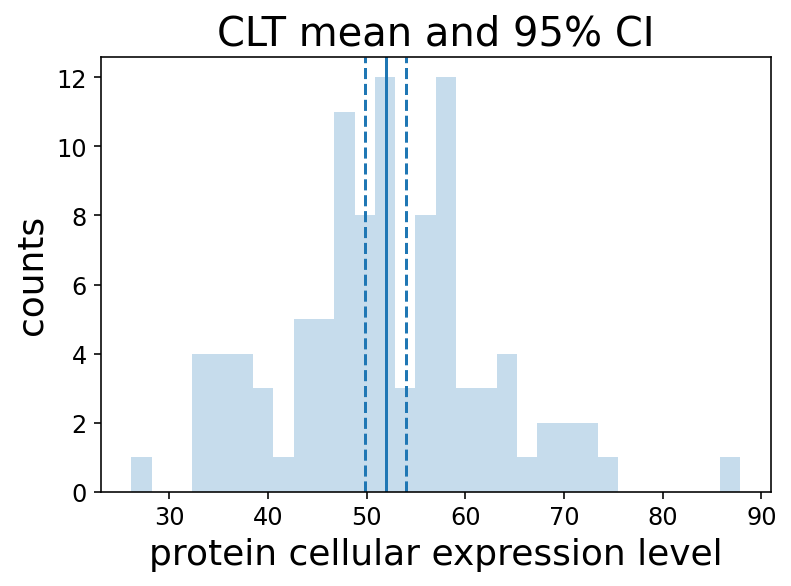

In [42]:
# CLT mean and 95% CI
plt.hist(expr_levels, 30, alpha=0.25)
plt.axvline(mu)
plt.axvline(lb, ls='--')
plt.axvline(ub, ls='--')
plt.xlabel('protein cellular expression level')
plt.ylabel('counts')
plt.title('CLT mean and 95% CI');

What is the 95% confidence interval for your estimate of the standard deviation in expression levels?

Can we use Central Limit Theorem for this?

In [44]:
expr_levels.std()

10.555069703840516

Use bootstrap to find the 95% confidence interval for your estimates of both the mean and standard deviation in expression levels?

In [45]:
num_bootstraps = 1000

bootstrap_means = np.zeros((num_bootstraps,))
bootstrap_stds = np.zeros((num_bootstraps,))

for i in range(num_bootstraps):
    bootstrap_sample = np.random.choice(expr_levels, size=expr_levels.shape, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_stds[i] = bootstrap_sample.std()

meanCI = np.quantile(bootstrap_means, [0.025, 0.975])
stdCI = np.quantile(bootstrap_stds, [0.025, 0.975])

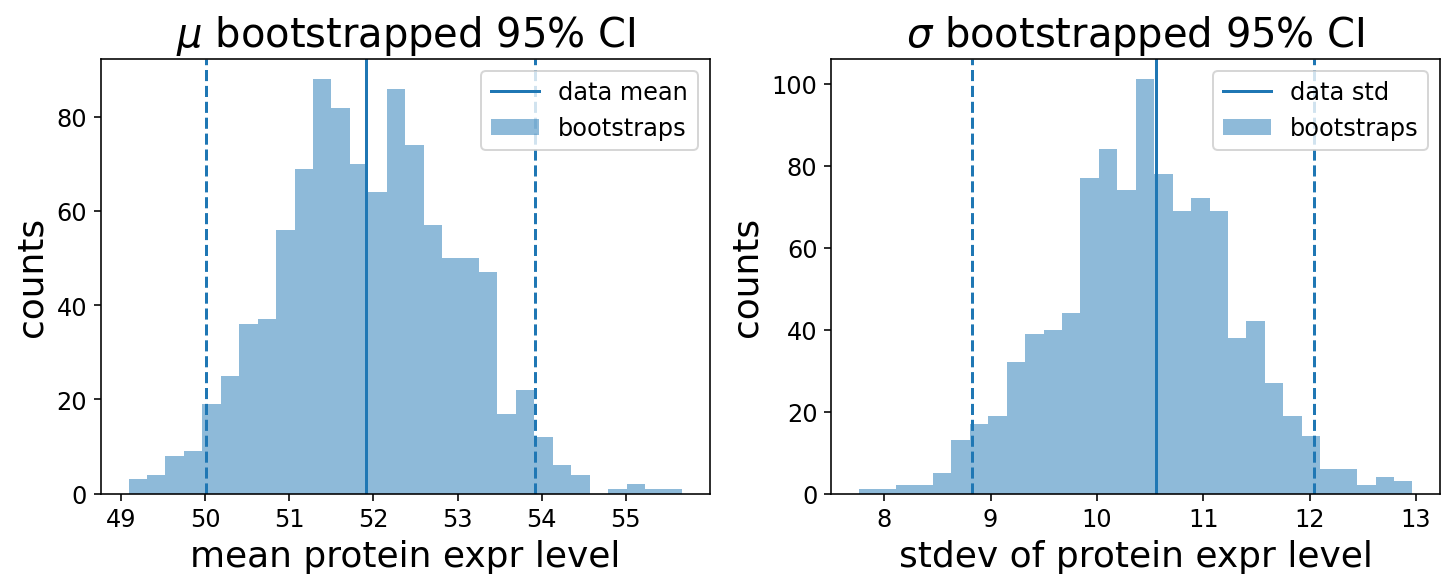

In [50]:
# mean, std and CIs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(bootstrap_means, bins=30, alpha=0.5, label='bootstraps')
plt.axvline(expr_levels.mean(), label='data mean')
plt.axvline(meanCI[0], ls='--')
plt.axvline(meanCI[1], ls='--')
plt.xlabel('mean protein expr level')
plt.ylabel('counts')
plt.title(r'$\mu$ bootstrapped 95% CI')
plt.legend();
plt.subplot(1, 2, 2)
plt.hist(bootstrap_stds, bins=30, alpha=0.5, label='bootstraps')
plt.axvline(expr_levels.std(), label='data std')
plt.axvline(stdCI[0], ls='--')
plt.axvline(stdCI[1], ls='--')
plt.xlabel('stdev of protein expr level')
plt.ylabel('counts')
plt.title(r'$\sigma$ bootstrapped 95% CI')
plt.legend();